1. Write a python program for generating a composite signal (you could use sine or cosine waves). The parameters including the signal frequencies of 40 Hz, 80 Hz, 160 Hz with the amplitudes of 10, 20, and 40 respectively, and the signal length should be limited to 512 in samples.
2. Plot the generated signal.
3. Do standard sampling by following the Nyquist rate.
4. Perform under sampling and over sampling too. Use Subplot function to show the original, sampled, under sampled, and over sampled signal.
5. Then perform N=512 point DFT, show the magnitude and phase spectrum.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math

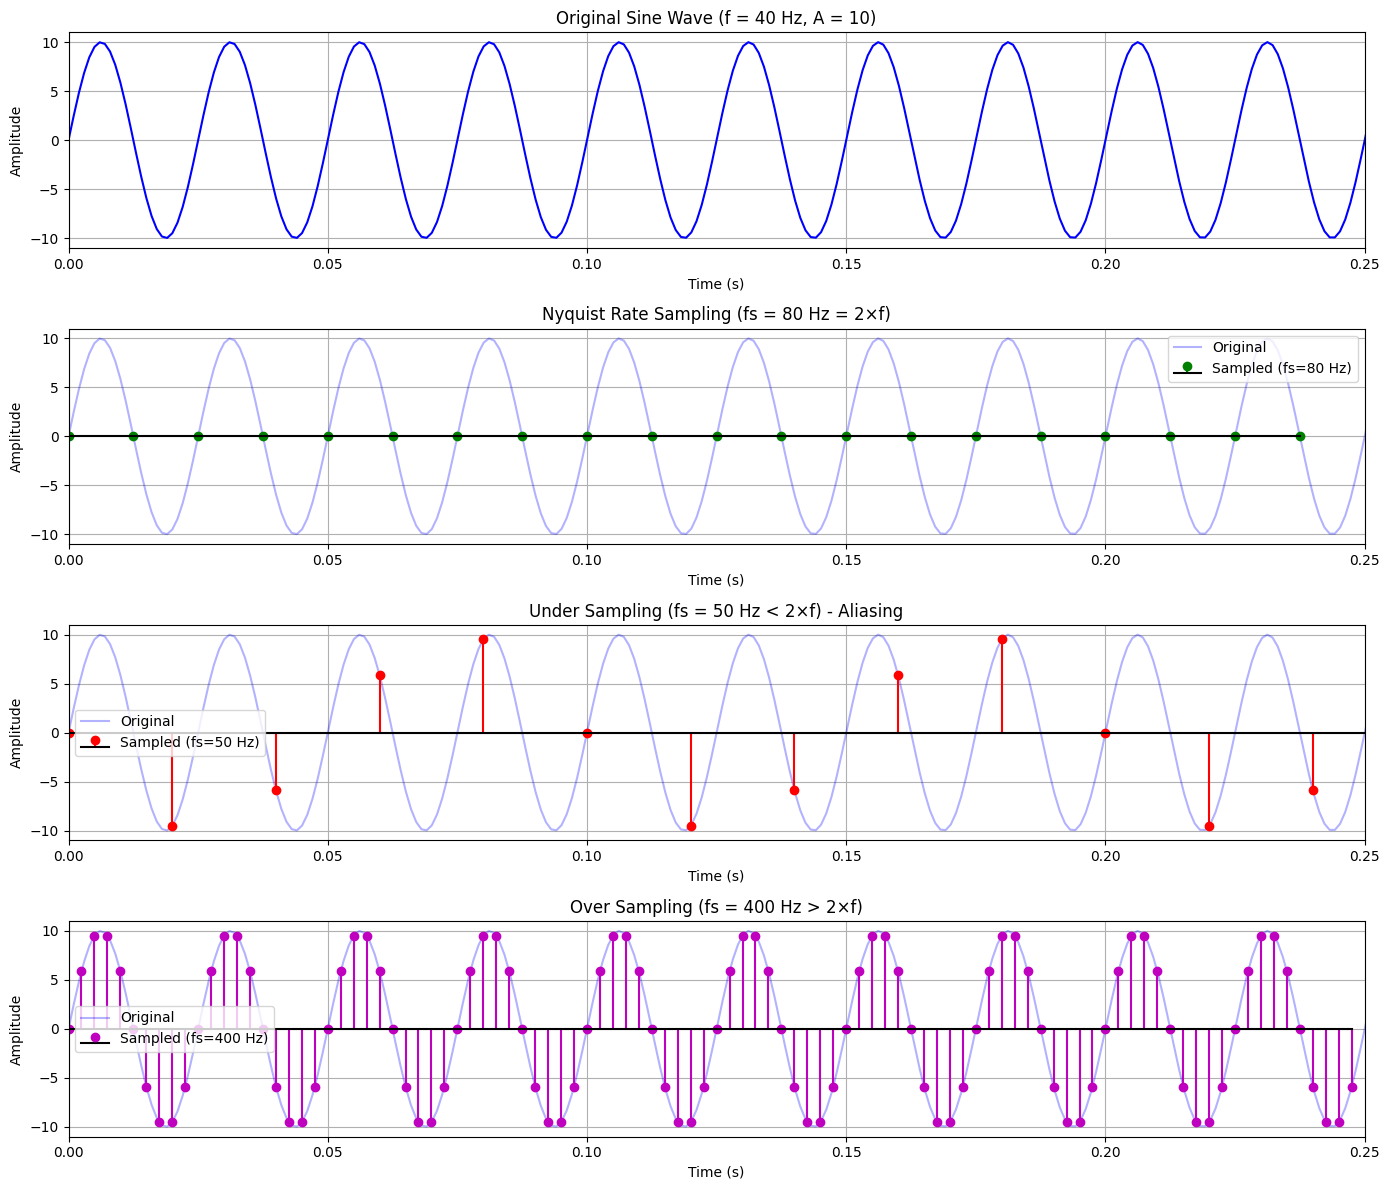

In [11]:
# Parameters for single sine wave
f = 40  # Frequency of sine wave (Hz)
A = 10  # Amplitude
N = 512  # Number of samples
fs = 512  # Original sampling frequency

# Generate continuous-like signal (high sample rate for visualization)
t_cont = np.linspace(0, 1, 1000)
x_cont = A * np.sin(2 * np.pi * f * t_cont)

# Nyquist rate sampling (fs = 2 * f = 80 Hz)
fs_nyquist = 2 * f
n_nyquist = np.arange(0, 20)
t_nyquist = n_nyquist / fs_nyquist
x_nyquist = A * np.sin(2 * np.pi * f * t_nyquist)

# Under sampling (fs < 2*f, causes aliasing)
fs_under = 50  # Below Nyquist rate
n_under = np.arange(0, 20)
t_under = n_under / fs_under
x_under = A * np.sin(2 * np.pi * f * t_under)

# Over sampling (fs > 2*f)
fs_over = 400  # Well above Nyquist rate
n_over = np.arange(0, 100)
t_over = n_over / fs_over
x_over = A * np.sin(2 * np.pi * f * t_over)

# Plot all sampling scenarios
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# Original continuous signal
axes[0].plot(t_cont, x_cont, 'b-', linewidth=1.5)
axes[0].set_title(f'Original Sine Wave (f = {f} Hz, A = {A})')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].set_xlim([0, 0.25])

# Nyquist rate sampling
axes[1].plot(t_cont, x_cont, 'b-', alpha=0.3, label='Original')
axes[1].stem(t_nyquist, x_nyquist, linefmt='g-', markerfmt='go', basefmt='k-', label=f'Sampled (fs={fs_nyquist} Hz)')
axes[1].set_title(f'Nyquist Rate Sampling (fs = {fs_nyquist} Hz = 2×f)')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True)
axes[1].legend()
axes[1].set_xlim([0, 0.25])

# Under sampling
axes[2].plot(t_cont, x_cont, 'b-', alpha=0.3, label='Original')
axes[2].stem(t_under, x_under, linefmt='r-', markerfmt='ro', basefmt='k-', label=f'Sampled (fs={fs_under} Hz)')
axes[2].set_title(f'Under Sampling (fs = {fs_under} Hz < 2×f) - Aliasing')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].grid(True)
axes[2].legend()
axes[2].set_xlim([0, 0.25])

# Over sampling
axes[3].plot(t_cont, x_cont, 'b-', alpha=0.3, label='Original')
axes[3].stem(t_over, x_over, linefmt='m-', markerfmt='mo', basefmt='k-', label=f'Sampled (fs={fs_over} Hz)')
axes[3].set_title(f'Over Sampling (fs = {fs_over} Hz > 2×f)')
axes[3].set_xlabel('Time (s)')
axes[3].set_ylabel('Amplitude')
axes[3].grid(True)
axes[3].legend()
axes[3].set_xlim([0, 0.25])

plt.tight_layout()
plt.show()

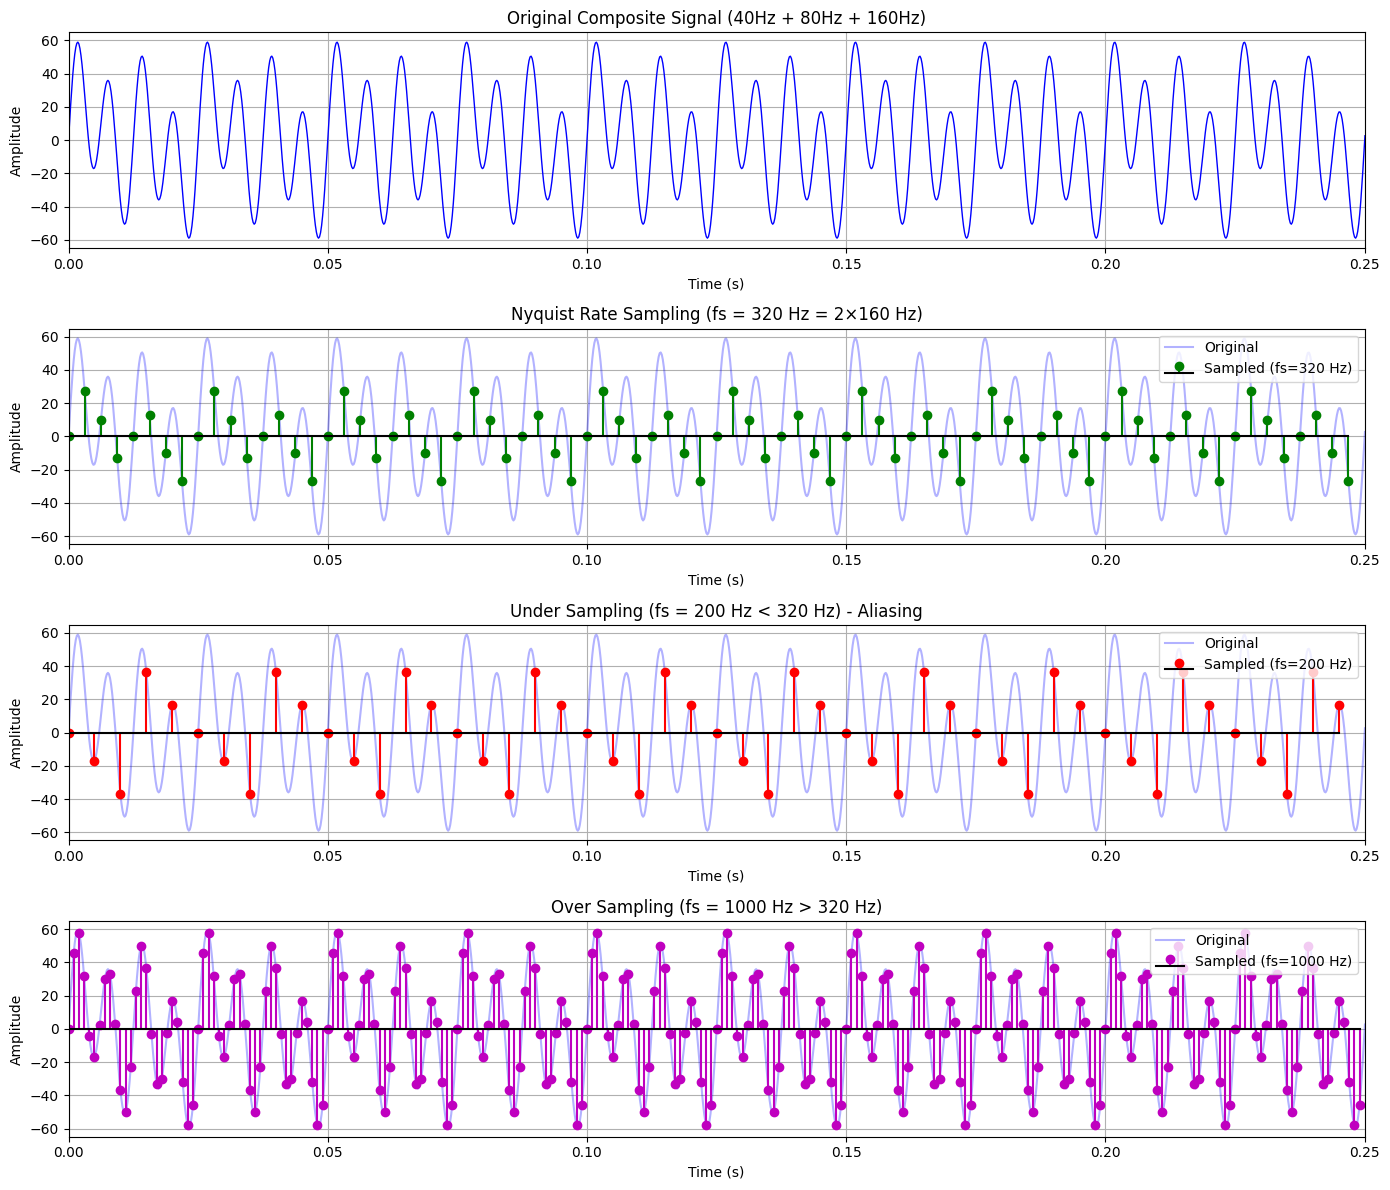

In [12]:
# Parameters for composite signal
f1, f2, f3 = 40, 80, 160  # Frequencies (Hz)
A1, A2, A3 = 10, 20, 40   # Amplitudes
N = 512  # Number of samples

# Generate continuous-like signal (high sample rate for visualization)
t_cont = np.linspace(0, 1, 5000)
x_cont = A1 * np.sin(2 * np.pi * f1 * t_cont) + \
         A2 * np.sin(2 * np.pi * f2 * t_cont) + \
         A3 * np.sin(2 * np.pi * f3 * t_cont)

# Nyquist rate: fs >= 2 * max_freq = 2 * 160 = 320 Hz
fs_nyquist = 320
n_nyquist = np.arange(0, 80)
t_nyquist = n_nyquist / fs_nyquist
x_nyquist = A1 * np.sin(2 * np.pi * f1 * t_nyquist) + \
            A2 * np.sin(2 * np.pi * f2 * t_nyquist) + \
            A3 * np.sin(2 * np.pi * f3 * t_nyquist)

# Under sampling (fs < 320 Hz, causes aliasing)
fs_under = 200
n_under = np.arange(0, 50)
t_under = n_under / fs_under
x_under = A1 * np.sin(2 * np.pi * f1 * t_under) + \
          A2 * np.sin(2 * np.pi * f2 * t_under) + \
          A3 * np.sin(2 * np.pi * f3 * t_under)

# Over sampling (fs > 320 Hz)
fs_over = 1000
n_over = np.arange(0, 250)
t_over = n_over / fs_over
x_over = A1 * np.sin(2 * np.pi * f1 * t_over) + \
         A2 * np.sin(2 * np.pi * f2 * t_over) + \
         A3 * np.sin(2 * np.pi * f3 * t_over)

# Plot all sampling scenarios
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# Original continuous composite signal
axes[0].plot(t_cont, x_cont, 'b-', linewidth=1)
axes[0].set_title(f'Original Composite Signal ({f1}Hz + {f2}Hz + {f3}Hz)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].set_xlim([0, 0.25])

# Nyquist rate sampling
axes[1].plot(t_cont, x_cont, 'b-', alpha=0.3, label='Original')
axes[1].stem(t_nyquist, x_nyquist, linefmt='g-', markerfmt='go', basefmt='k-', label=f'Sampled (fs={fs_nyquist} Hz)')
axes[1].set_title(f'Nyquist Rate Sampling (fs = {fs_nyquist} Hz = 2×{f3} Hz)')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True)
axes[1].legend()
axes[1].set_xlim([0, 0.25])

# Under sampling
axes[2].plot(t_cont, x_cont, 'b-', alpha=0.3, label='Original')
axes[2].stem(t_under, x_under, linefmt='r-', markerfmt='ro', basefmt='k-', label=f'Sampled (fs={fs_under} Hz)')
axes[2].set_title(f'Under Sampling (fs = {fs_under} Hz < 320 Hz) - Aliasing')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].grid(True)
axes[2].legend()
axes[2].set_xlim([0, 0.25])

# Over sampling
axes[3].plot(t_cont, x_cont, 'b-', alpha=0.3, label='Original')
axes[3].stem(t_over, x_over, linefmt='m-', markerfmt='mo', basefmt='k-', label=f'Sampled (fs={fs_over} Hz)')
axes[3].set_title(f'Over Sampling (fs = {fs_over} Hz > 320 Hz)')
axes[3].set_xlabel('Time (s)')
axes[3].set_ylabel('Amplitude')
axes[3].grid(True)
axes[3].legend()
axes[3].set_xlim([0, 0.25])

plt.tight_layout()
plt.show()